In [49]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

## Load data

In [35]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## class names 

In [40]:
class_name=data['Species'].unique()
class_name


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Handle categorical classes

In [41]:


le = preprocessing.LabelEncoder()
data["labels"]=le.fit_transform(data["Species"])
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


## Split data

In [43]:
X=data.drop(['Id','Species','labels'],axis=1)
y=data['labels']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

## Build decision tree

In [45]:

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
ytrain_preds=model.predict(X_train)
ytest_preds=model.predict(X_test)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


## Evaluation

In [46]:


train_accuracy = accuracy_score(np.array(y_train),ytrain_preds)
test_accuracy = accuracy_score(np.array(y_train),ytrain_preds)

print("The accuracy of training data is {}".format(train_accuracy))
print("The accuracy of test data is {}".format(test_accuracy))



The accuracy of training data is 1.0
The accuracy of test data is 1.0


In [47]:
print(classification_report(np.array(y_test),ytest_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



## Visualize decision tree 

### 1. Using graphviz package

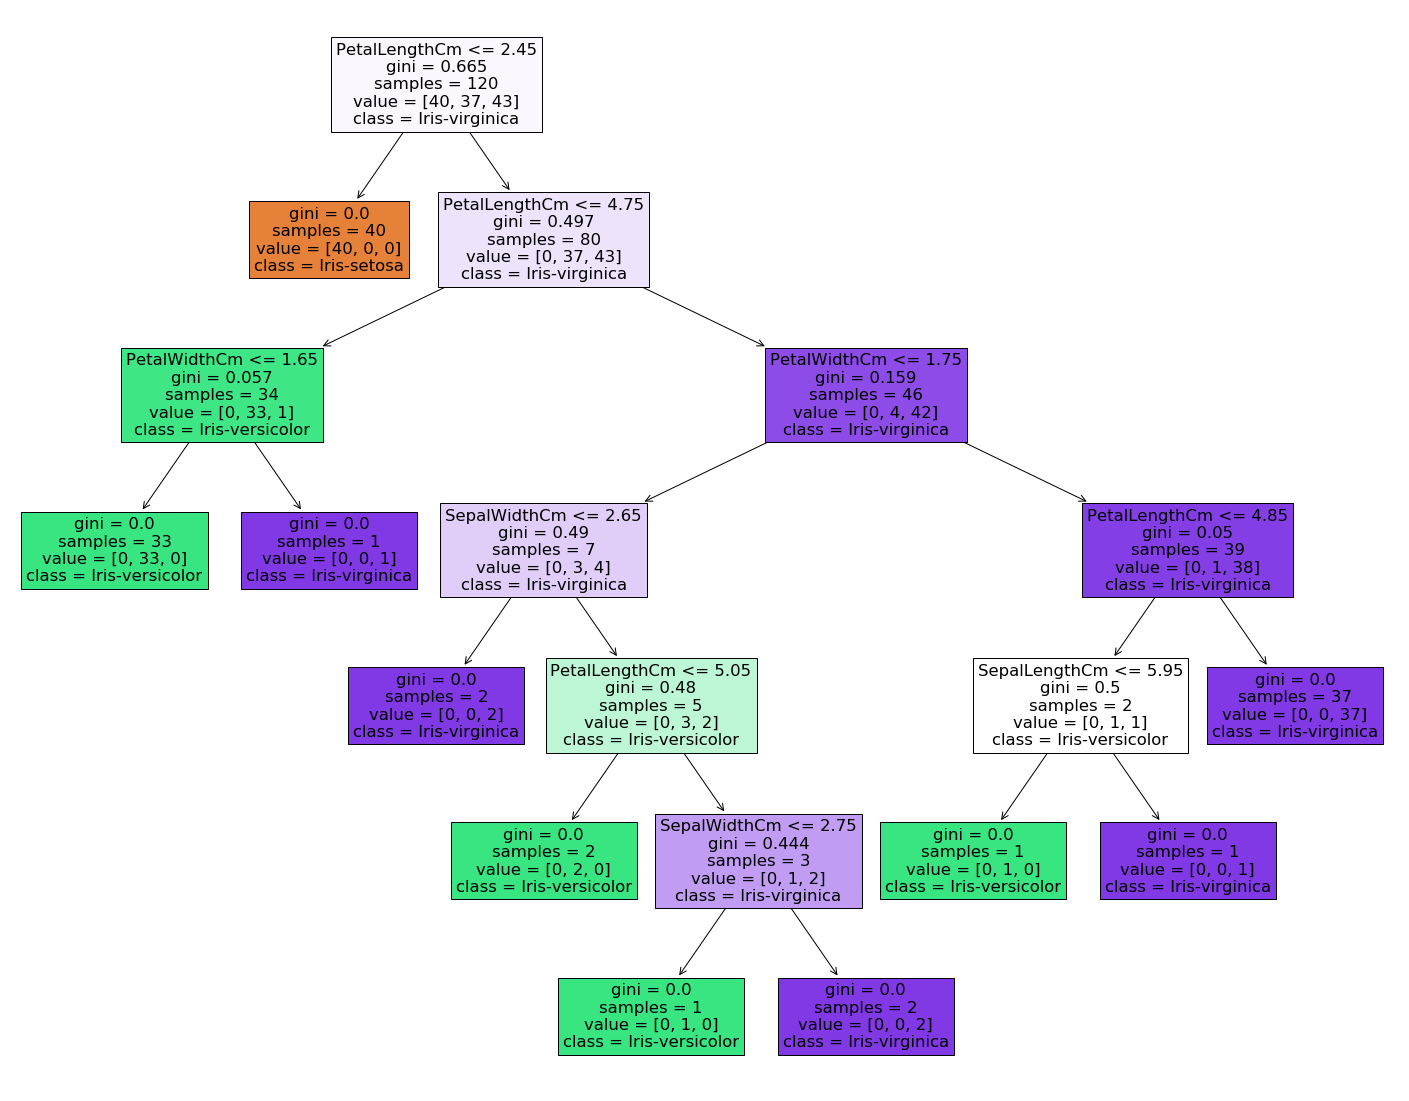

In [33]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Home/Anaconda3/Library/bin/graphviz/'
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=data.columns[1:-2],  
                   class_names=list(class_name),
                   filled=True)

### 2. Using dtreeviz Package

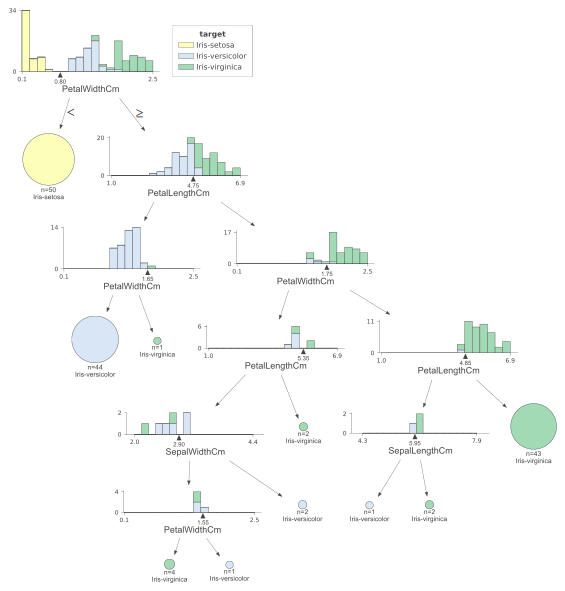

In [50]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Home/Anaconda3/Library/bin/graphviz/'
from dtreeviz.trees import dtreeviz # remember to load the package


viz = dtreeviz(model, X, y,
                target_name="target",
                feature_names=data.columns[1:-2],
                class_names=list(class_name))

viz
